In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df= pd.read_csv("Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

C:\Users\Papa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

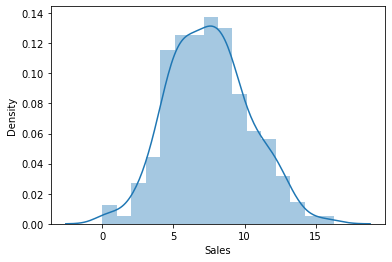

In [6]:
sns.distplot(df["Sales"])

In [7]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"
    
df.Sales=df.Sales.apply(split)

<AxesSubplot:>

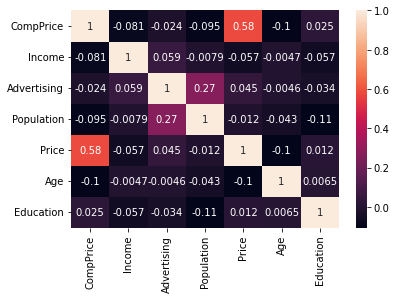

In [8]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [9]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  \
0  average sale        138      73           11         276    120       Bad   
1     high sale        111      48           16         260     83      Good   
2     high sale        113      35           10         269     80    Medium   
3  average sale        117     100            4         466     97    Medium   
4      low sale        141      64            3         340    128       Bad   

   Age  Education Urban   US  
0   42         17   Yes  Yes  
1   65         10   Yes  Yes  
2   59         12   Yes  Yes  
3   55         14   Yes  Yes  
4   38         13   Yes   No

In [10]:
#Label encoding dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
df['ShelveLoc']= le.fit_transform(df['ShelveLoc'])
df['Urban']= le.fit_transform(df['Urban'])
df['US']= le.fit_transform(df['US'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

In [13]:
x=df.iloc[:,1:11]
y=df.iloc[:,0]

In [14]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Building Decision Tree Classifier using Entropy Criteria

In [15]:
model=DE (criterion="entropy",max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

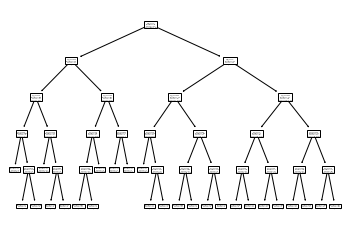

In [16]:
#PLot the decision tree
tree.plot_tree(model);

In [17]:
fn=["Sales","CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
cn=["low sale","average sale","high sale"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=5000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [18]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

average sale    49
low sale        17
high sale       14
dtype: int64

In [19]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0         average sale  high sale  low sale
Sales                                          
average sale            35          5         8
high sale                6          9         0
low sale                 8          0         9

In [20]:
# Accuracy 
np.mean(preds==y_test)

0.6625

In [21]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})
df

actual     predicted
186  average sale  average sale
177     high sale  average sale
357     high sale  average sale
204  average sale  average sale
28       low sale  average sale
..            ...           ...
150     high sale  average sale
263  average sale  average sale
370  average sale      low sale
248  average sale  average sale
308  average sale  average sale

[80 rows x 2 columns]

#Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [23]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.6625